# Лабораторная работа №1
## Выполнил: Гневнов А.Е., ИВТ 2.1
### 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

### 2. Загрузка данных

In [2]:
# Загрузка данных (предположим, файл называется 'bank_churn.csv')
data = pd.read_csv('churn.csv')

# Просмотр первых строк
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

### 3. Предварительный анализ данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geogr

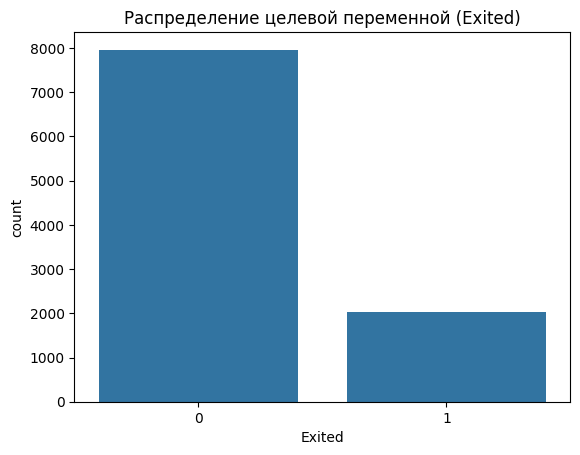

In [3]:
# Проверка информации о данных
print(data.info())

# Проверка пропущенных значений
print(data.isnull().sum())

# Анализ целевой переменной
sns.countplot(x='Exited', data=data)
plt.title('Распределение целевой переменной (Exited)')
plt.show()

### 4. Предобработка данных

In [4]:
# Удаление ненужных столбцов
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Кодирование категориальных переменных
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

# Разделение на признаки и целевую переменную
X = data.drop('Exited', axis=1)
y = data['Exited']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

### 5. Построение модели логистической регрессии

In [5]:
# Создание и обучение модели
model = LogisticRegression(
    solver='saga', 
    max_iter=1000, 
    random_state=42
)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

### 6. Оценка модели

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



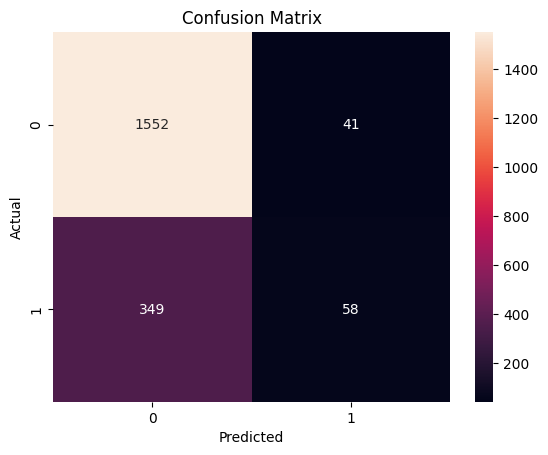

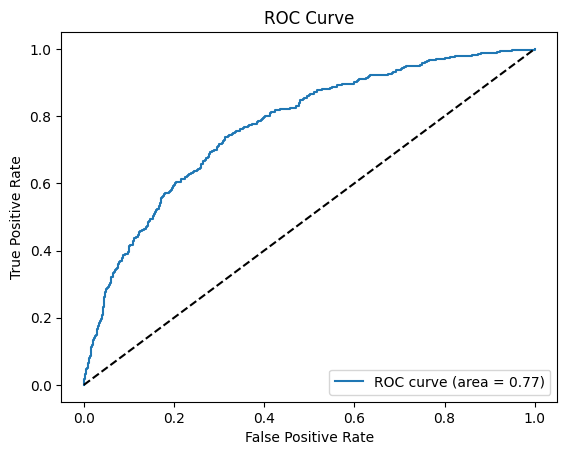

In [6]:
# Отчет о классификации
print(classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 7. Анализ результатов

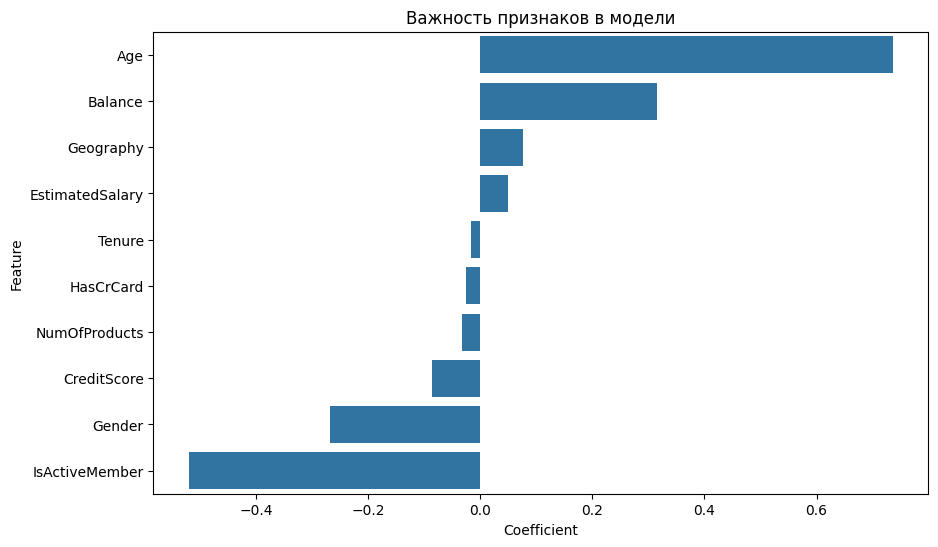

c:\Users\gnevn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gnevn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gnevn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

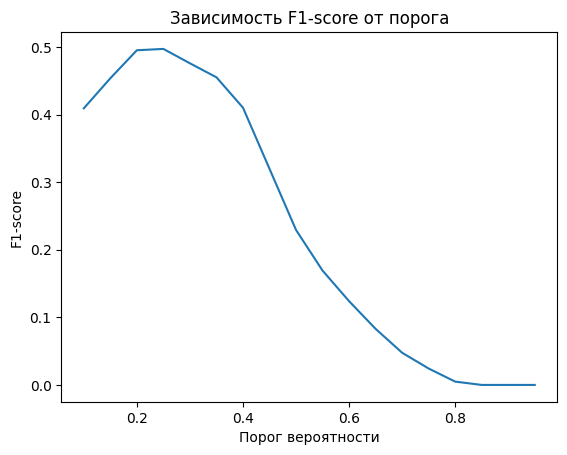

In [7]:
# Важность признаков
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Важность признаков в модели')
plt.show()

# Анализ порога классификации
thresholds = np.arange(0.1, 1, 0.05)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    report = classification_report(y_test, y_pred_thresh, output_dict=True)
    f1_scores.append(report['1']['f1-score'])

plt.plot(thresholds, f1_scores)
plt.xlabel('Порог вероятности')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от порога')
plt.show()

### Анализ результатов
Precision (59%): Из всех клиентов, которых модель предсказала как ушедших, только 59% действительно ушли. Это означает много ложноположительных срабатываний.

Recall (14%): Модель определяет только 14% реально ушедших клиентов. Это критически низкий показатель - 86% ушедших клиентов модель не распознаёт.

F1-score (23%): Гармоническое среднее precision и recall, подтверждает низкое качество предсказаний для этого класса. 
   
*Важность признаков:*   

Age (0.6): Самый сильный предиктор. С увеличением возраста вероятность оттока растёт.

IsActiveMember (-0.4): Активные клиенты значительно реже уходят.

Balance (0.4): Клиенты с большим балансом склонны к оттоку.

Geography (0.3): География проживания влияет на вероятность оттока.